# Proyek Analisis Data: Bike Sharing
- **Nama:** Valentino Rocky Atmojo
- **Email:** valent.rocky1302@gmail.com
- **ID Dicoding:** 8183779

## Menentukan Pertanyaan Bisnis

- Jam berapakah jam sibuk penyewaan sepeda dilihat dari rata-rata penyewaan sepeda tiap jam berdasarkan linkungan sekitar (temperatur udara, kelembapan udara, dan kecepatan angin) dan musim?
- Berapa rata-rata penyewaan sepeda pada tiap harinya berdasarkan tipe usernya?

## Import Semua Packages/Library yang Digunakan

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [10]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [14]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [26]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [18]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

In [20]:
def changeToDate(df, columns):
  for column in columns:
    df[column] = pd.to_datetime(df[column])

In [21]:
changeToDate(day_df, ['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [24]:
changeToDate(hour_df, ['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [141]:
hour_df.groupby(by=["hr", pd.cut(hour_df["temp"], np.arange(0.0, 1.1, 0.2))]).agg({
    "cnt" : "mean"
})

cnt
hr temp                  
0  (0.0, 0.2]   20.652174
   (0.2, 0.4]   38.678862
   (0.4, 0.6]   58.910638
   (0.6, 0.8]   74.045918
   (0.8, 1.0]  102.666667
...                   ...
23 (0.0, 0.2]   28.765957
   (0.2, 0.4]   58.525424
   (0.4, 0.6]   97.090909
   (0.6, 0.8]  123.363208
   (0.8, 1.0]   98.000000

[120 rows x 1 columns]

In [187]:
hour_df.groupby(by=["hr", pd.cut(hour_df["hum"], np.arange(0.0, 1.1, 0.2))]).agg({
    "cnt" : "mean"
})

cnt
hr hum                  
0  (0.0, 0.2]  29.000000
   (0.2, 0.4]  46.531250
   (0.4, 0.6]  56.141361
   (0.6, 0.8]  55.273684
   (0.8, 1.0]  51.541667
...                  ...
23 (0.0, 0.2]  77.000000
   (0.2, 0.4]  70.121951
   (0.4, 0.6]  92.087963
   (0.6, 0.8]  93.163636
   (0.8, 1.0]  79.644330

[120 rows x 1 columns]

In [191]:
hour_df.groupby(by=["hr", pd.cut(hour_df["windspeed"], np.arange(0.0, 1.1, 0.2))]).agg({
    "cnt" : "mean"
})

cnt
hr windspeed            
0  (0.0, 0.2]  58.286802
   (0.2, 0.4]  48.162437
   (0.4, 0.6]  28.300000
   (0.6, 0.8]        NaN
   (0.8, 1.0]        NaN
...                  ...
23 (0.0, 0.2]  93.310433
   (0.2, 0.4]  78.800948
   (0.4, 0.6]  45.761905
   (0.6, 0.8]  86.000000
   (0.8, 1.0]        NaN

[120 rows x 1 columns]

In [196]:
hour_df.groupby(by=["hr", "season"]).agg({
    "cnt" : "mean"
})

cnt
hr season            
0  1        27.404494
   2        56.842391
   3        73.914439
   4        56.333333
1  1        18.140449
...               ...
22 4       123.564972
23 1        44.411111
   2        95.983696
   3       122.919786
   4        86.440678

[96 rows x 1 columns]

In [79]:
day_df.groupby(by="weekday").agg({
    "casual" : "mean",
    "registered" : "mean"
})

,casual,registered
weekday,,
0,1338.295238,2890.533333
1,674.133333,3663.990476
2,556.182692,3954.480769
3,551.144231,3997.394231
4,590.961538,4076.298077
5,752.288462,3938.000000
6,1465.257143,3085.285714


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [210]:
hourly_based_temp = hour_df.groupby(by=["hr", pd.cut(hour_df["temp"], np.arange(0.0, 1.1, 0.2))]).agg({
    "cnt" : "mean"
})
hourly_based_hum = hour_df.groupby(by=["hr", pd.cut(hour_df["hum"], np.arange(0.0, 1.1, 0.2))]).agg({
    "cnt" : "mean"
})
hourly_based_windspeed = hour_df.groupby(by=["hr", pd.cut(hour_df["windspeed"], np.arange(0.0, 1.1, 0.2))]).agg({
    "cnt" : "mean"
})
hourly_based_season = hour_df.groupby(by=["hr", "season"]).agg({
    "cnt" : "mean"
})

<ipython-input-211-11b6a516f029>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=15)
<ipython-input-211-11b6a516f029>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=15)
<ipython-input-211-11b6a516f029>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=15)
<ipython-input-211-11b6a516f029>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=15)
<ipython-input-211-11b6a516f029>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=15)
<ipython-input-211-11b6a516f029>:9: UserWarning: FixedFormatter should only be used together with FixedLo

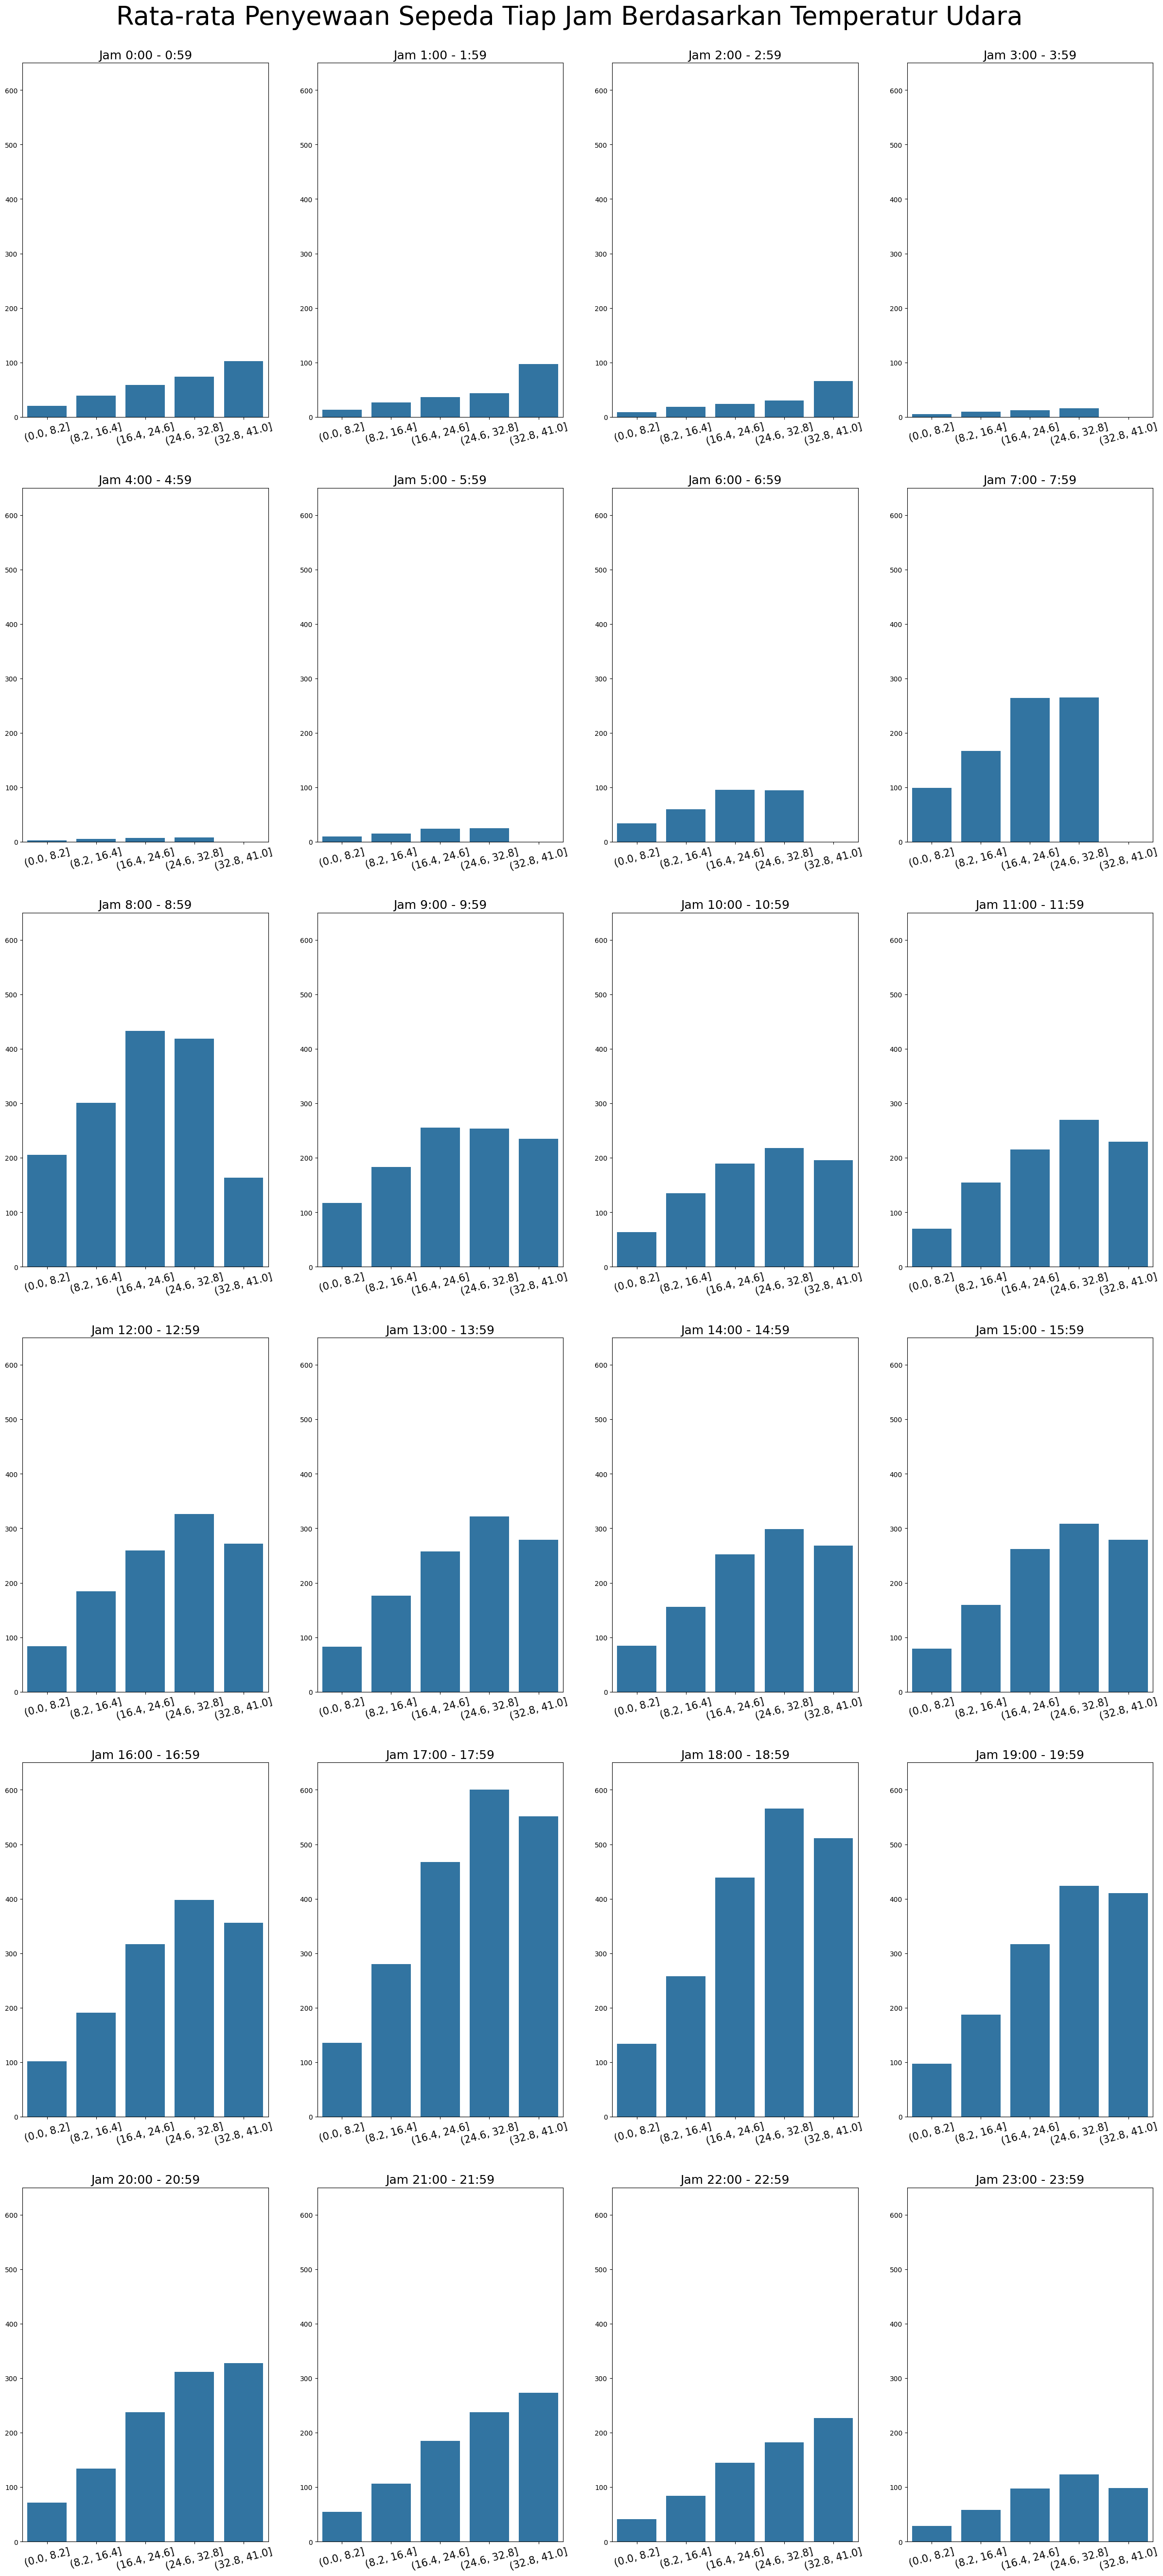

In [211]:
fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(30, 60))

for i in range(6):
  for j in range(4):
    sns.barplot(y="cnt", x=["(0.0, 8.2]","(8.2, 16.4]","(16.4, 24.6]","(24.6, 32.8]","(32.8, 41.0]"], data=hourly_based_temp[i*20+j*5:i*20+j*5+5], ax=ax[i][j])
    ax[i][j].set_ylabel(None)
    ax[i][j].set_ylim(0, 650)
    ax[i][j].set_xlabel(None)
    ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=15)
    ax[i][j].set_title("Jam "+str(i*4+j)+":00 - "+str(i*4+j)+":59", loc="center", fontsize=18)
    ax[i][j].tick_params(axis ='x', labelsize=15)

plt.suptitle("Rata-rata Penyewaan Sepeda Tiap Jam Berdasarkan Temperatur Udara", fontsize=38)
plt.subplots_adjust(top=0.96)
plt.show()

<ipython-input-212-5e6d2763add0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=15)
<ipython-input-212-5e6d2763add0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=15)
<ipython-input-212-5e6d2763add0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=15)
<ipython-input-212-5e6d2763add0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=15)
<ipython-input-212-5e6d2763add0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=15)
<ipython-input-212-5e6d2763add0>:9: UserWarning: FixedFormatter should only be used together with FixedLo

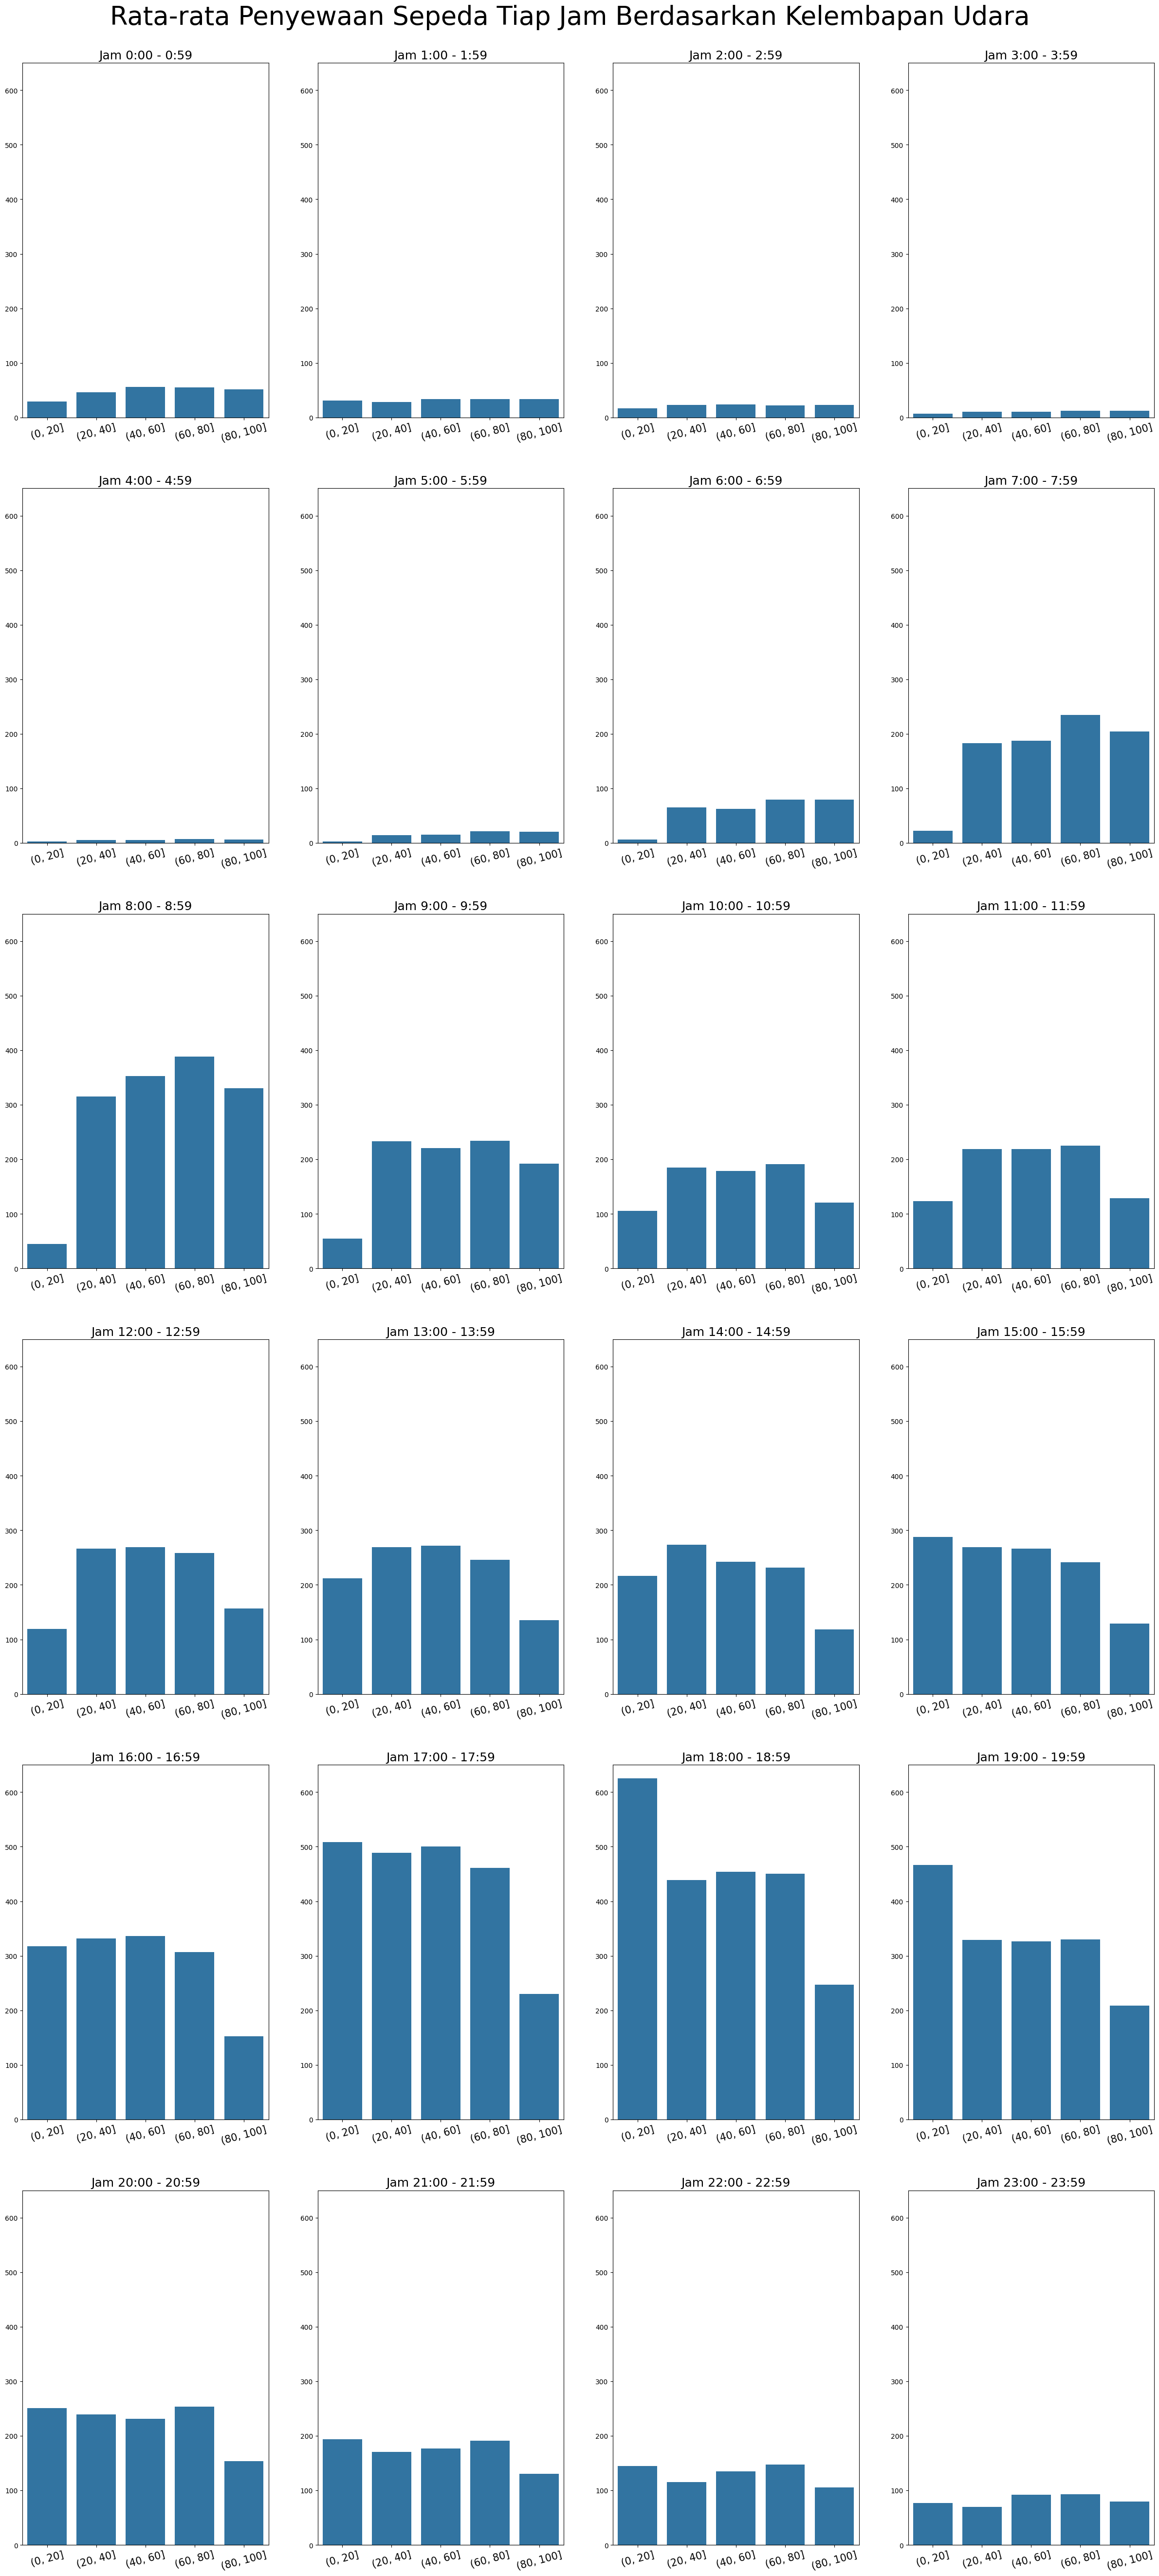

In [212]:
fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(30, 60))

for i in range(6):
  for j in range(4):
    sns.barplot(y="cnt", x=["(0, 20]","(20, 40]","(40, 60]","(60, 80]","(80, 100]"], data=hourly_based_hum[i*20+j*5:i*20+j*5+5], ax=ax[i][j])
    ax[i][j].set_ylabel(None)
    ax[i][j].set_ylim(0, 650)
    ax[i][j].set_xlabel(None)
    ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=15)
    ax[i][j].set_title("Jam "+str(i*4+j)+":00 - "+str(i*4+j)+":59", loc="center", fontsize=18)
    ax[i][j].tick_params(axis ='x', labelsize=15)

plt.suptitle("Rata-rata Penyewaan Sepeda Tiap Jam Berdasarkan Kelembapan Udara", fontsize=38)
plt.subplots_adjust(top=0.96)
plt.show()

<ipython-input-213-a906ae1e3be6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=15)
<ipython-input-213-a906ae1e3be6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=15)
<ipython-input-213-a906ae1e3be6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=15)
<ipython-input-213-a906ae1e3be6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=15)
<ipython-input-213-a906ae1e3be6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=15)
<ipython-input-213-a906ae1e3be6>:9: UserWarning: FixedFormatter should only be used together with FixedLo

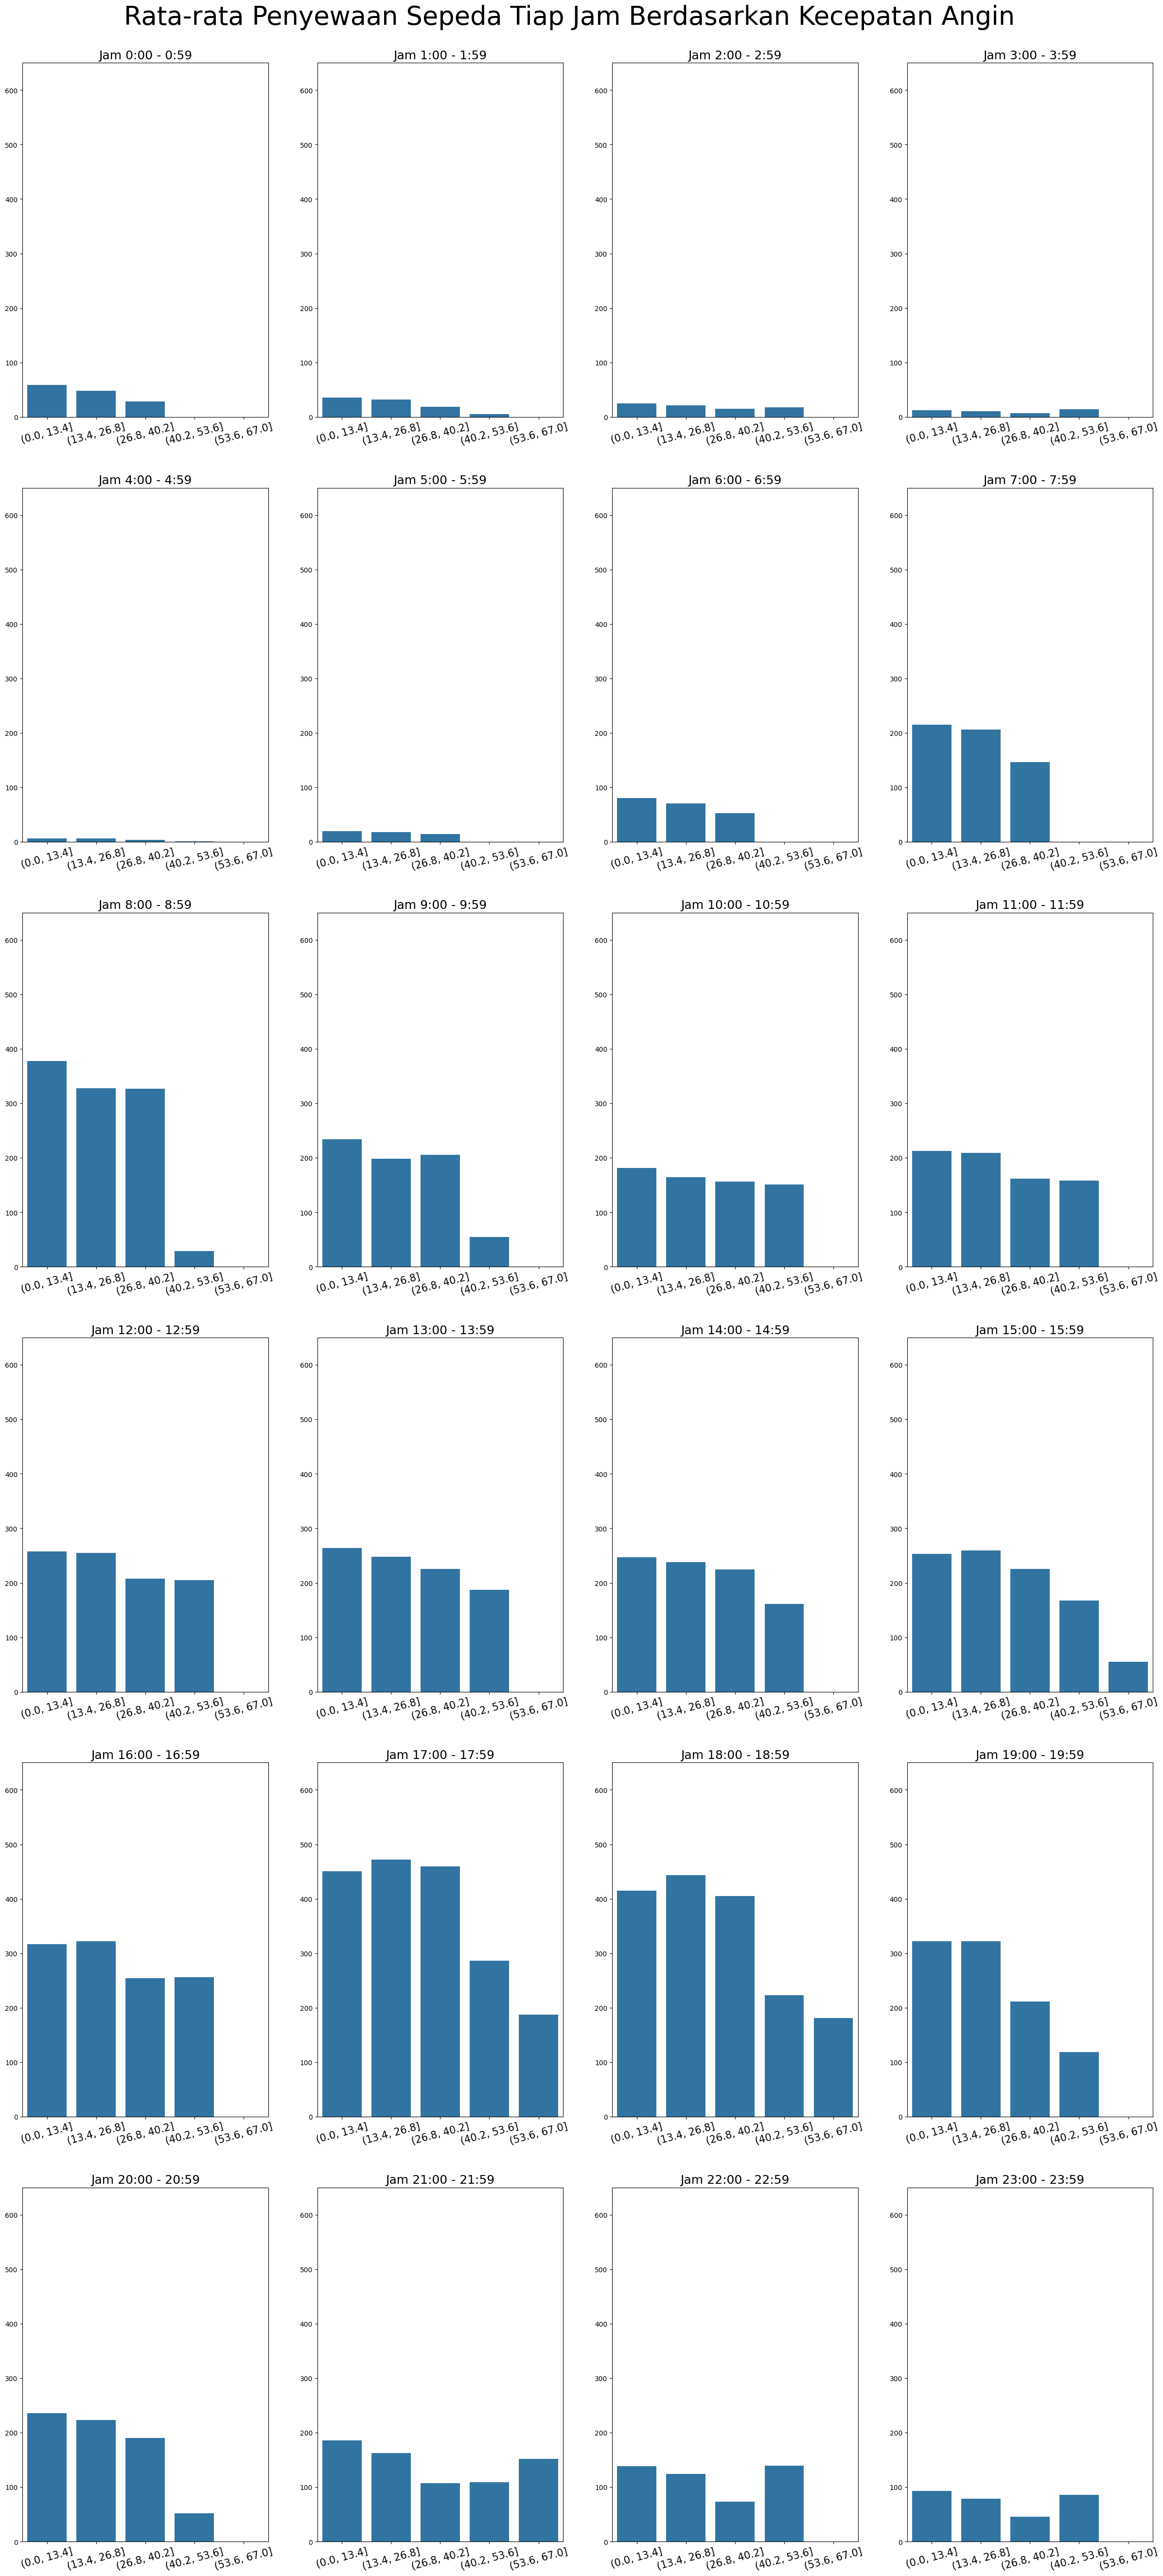

In [213]:
fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(30, 60))

for i in range(6):
  for j in range(4):
    sns.barplot(y="cnt", x=["(0.0, 13.4]","(13.4, 26.8]","(26.8, 40.2]","(40.2, 53.6]","(53.6, 67.0]"], data=hourly_based_windspeed[i*20+j*5:i*20+j*5+5], ax=ax[i][j])
    ax[i][j].set_ylabel(None)
    ax[i][j].set_ylim(0, 650)
    ax[i][j].set_xlabel(None)
    ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=15)
    ax[i][j].set_title("Jam "+str(i*4+j)+":00 - "+str(i*4+j)+":59", loc="center", fontsize=18)
    ax[i][j].tick_params(axis ='x', labelsize=15)

plt.suptitle("Rata-rata Penyewaan Sepeda Tiap Jam Berdasarkan Kecepatan Angin", fontsize=38)
plt.subplots_adjust(top=0.96)
plt.show()

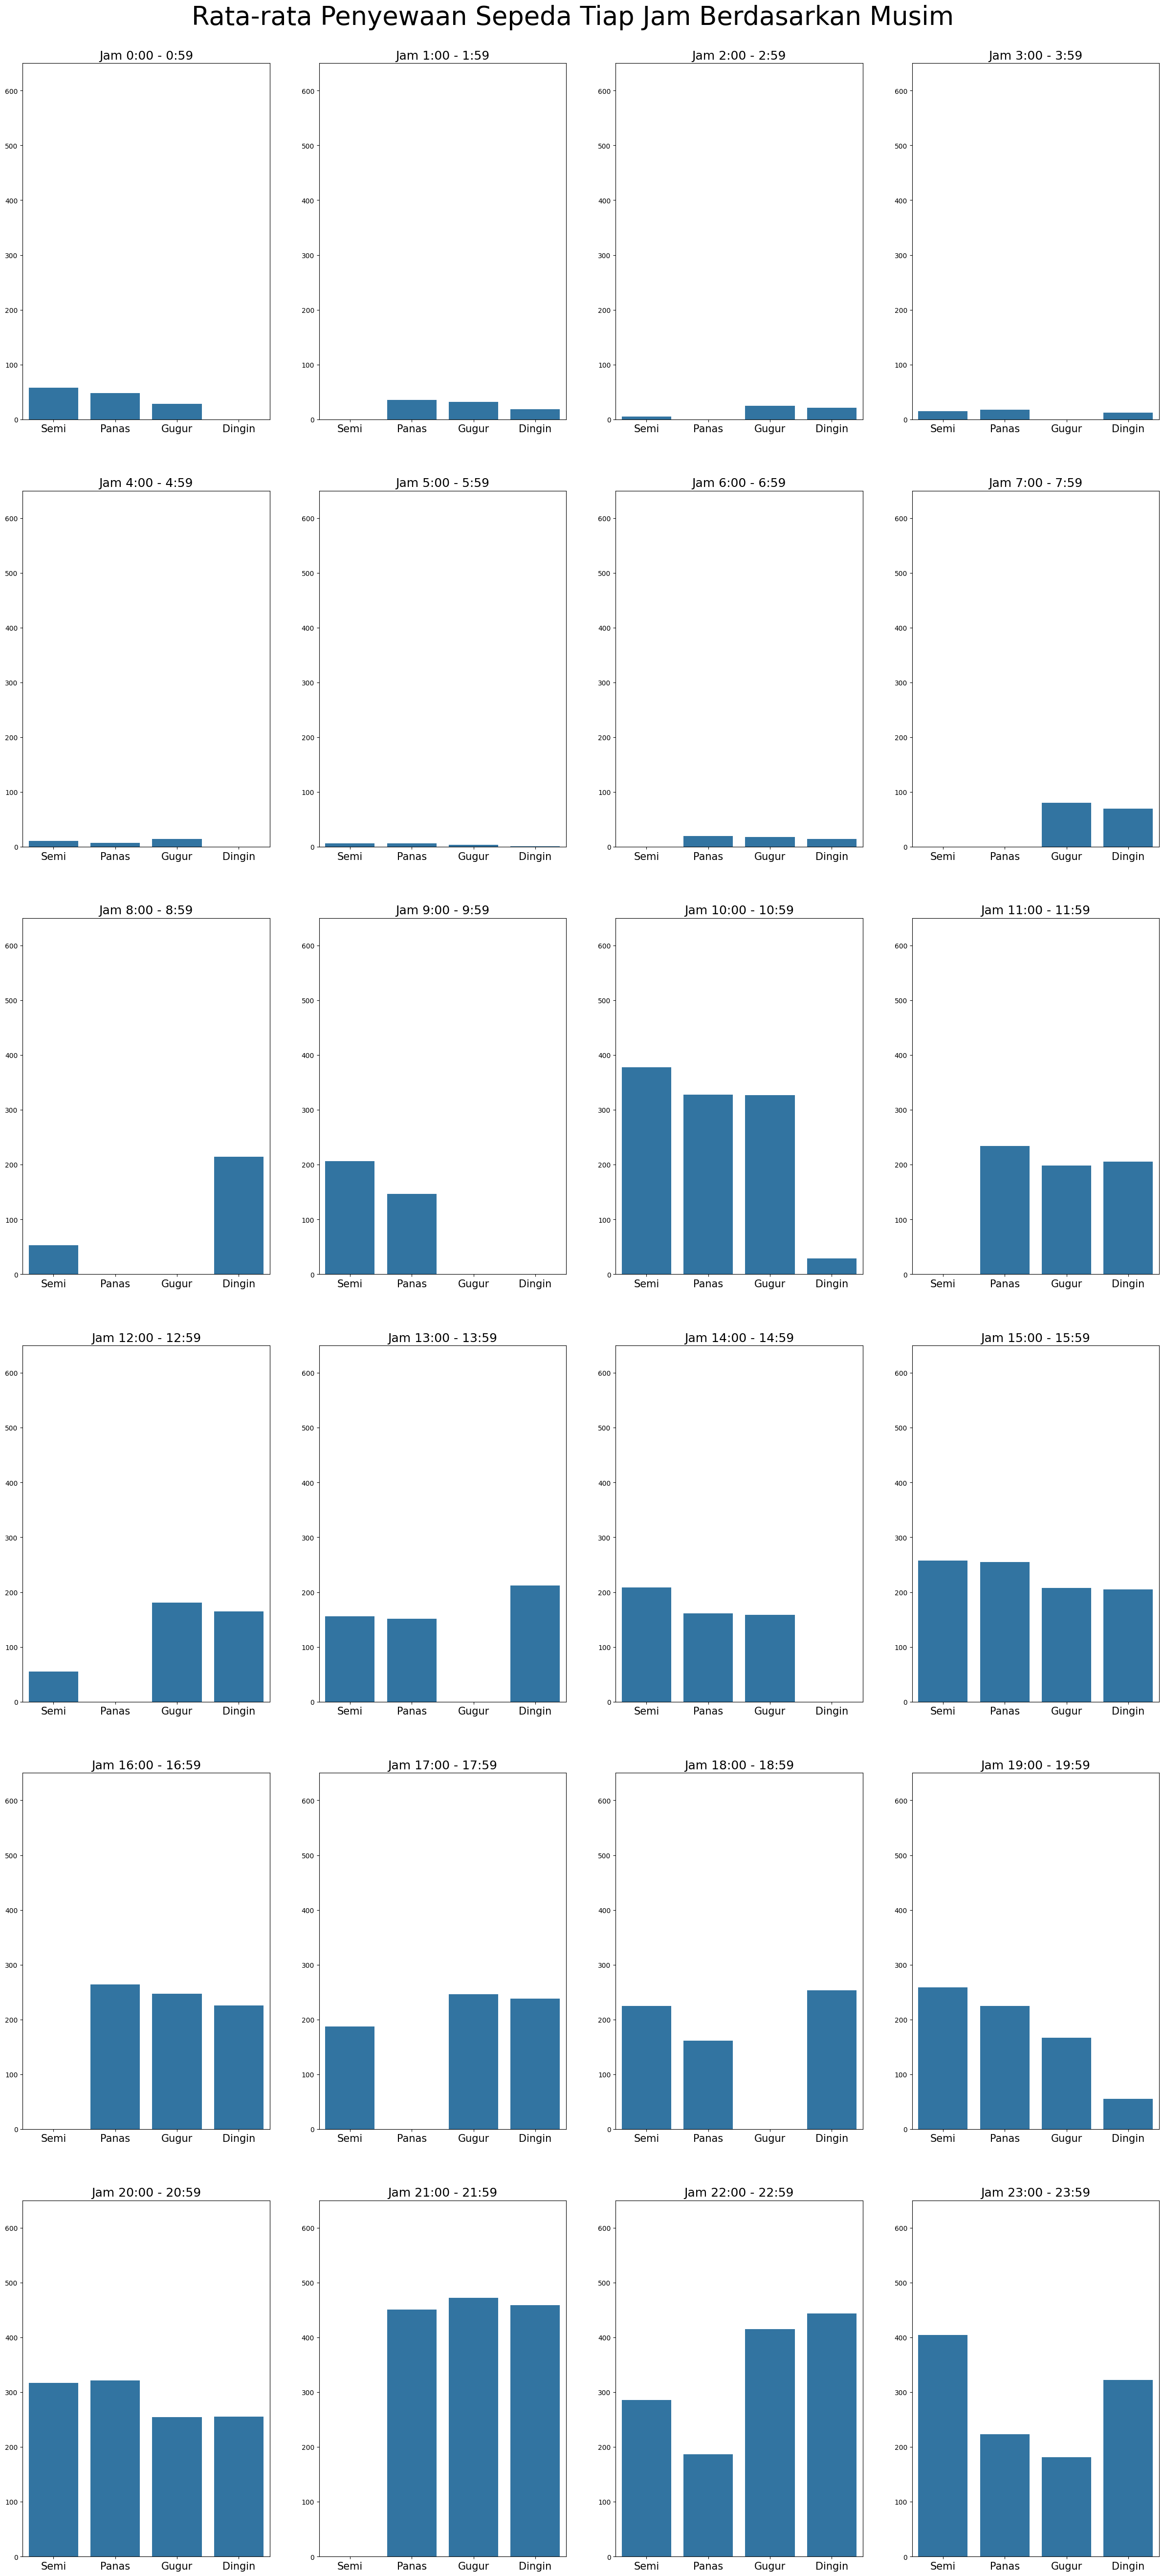

In [214]:
fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(30, 60))

for i in range(6):
  for j in range(4):
    sns.barplot(y="cnt", x=["Semi", "Panas", "Gugur", "Dingin"], data=hourly_based_windspeed[i*16+j*4:i*16+j*4+4], ax=ax[i][j])
    ax[i][j].set_ylabel(None)
    ax[i][j].set_ylim(0, 650)
    ax[i][j].set_xlabel(None)
    ax[i][j].set_title("Jam "+str(i*4+j)+":00 - "+str(i*4+j)+":59", loc="center", fontsize=18)
    ax[i][j].tick_params(axis ='x', labelsize=15)

plt.suptitle("Rata-rata Penyewaan Sepeda Tiap Jam Berdasarkan Musim", fontsize=38)
plt.subplots_adjust(top=0.96)
plt.show()

### Pertanyaan 2:

In [215]:
daily_rental = day_df.groupby(by="weekday", as_index=False).agg({
    "casual" : "mean",
    "registered" : "mean"
})

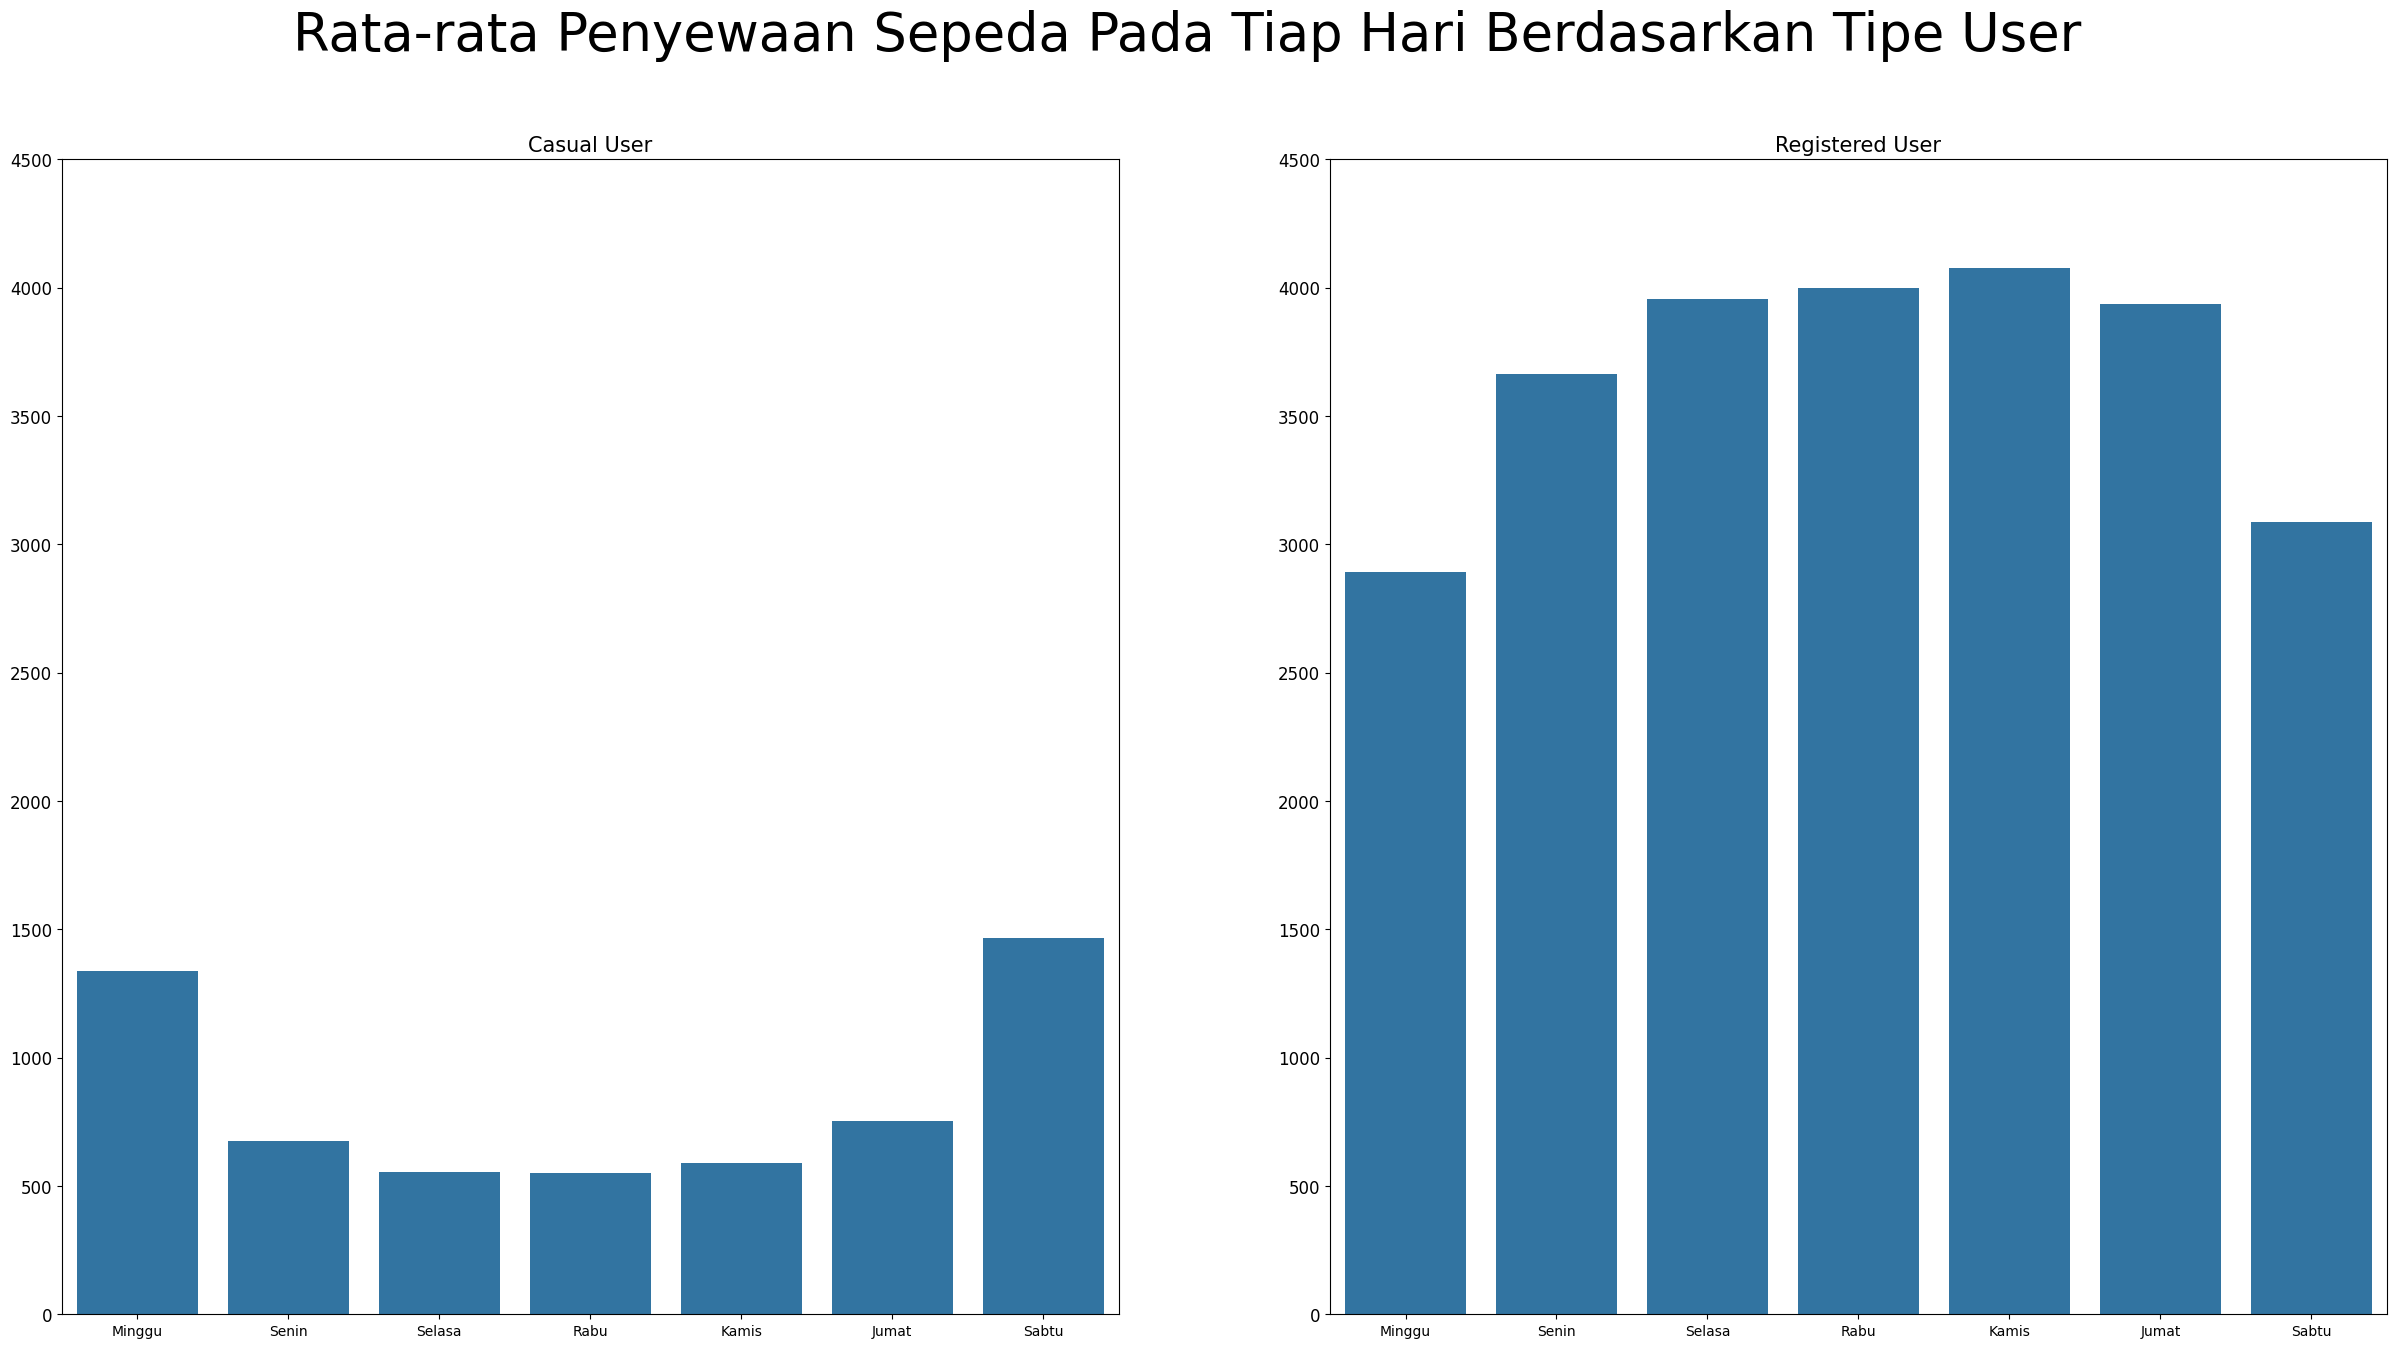

In [217]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 15))

sns.barplot(x=["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"], y="casual", data=daily_rental, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_ylim(0, 4500)
ax[0].set_xlabel(None)
ax[0].set_title("Casual User", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x=["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"], y="registered", data=daily_rental, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_ylim(0, 4500)
ax[1].set_xlabel(None)
ax[1].set_title("Registered User", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=12)

plt.suptitle("Rata-rata Penyewaan Sepeda Pada Tiap Hari Berdasarkan Tipe User", fontsize=38)
plt.show()

## Conclusion

- Jadi, berdasarkan temperatur udara, jam sibuknya berada pada jam 17.00 hingga 17.59 dengan tingkat temperatur udara berkisaran 24,6 hingga 32,8. Berdasarkan kelembapan udara, jam sibuknya berada pada jam 18.00 hingga 18.59 dengan tingkat kelembapan udara berkisaran 0 hingga 20. Berdasarkan kecepatan angin, jam sibuknya berada pada jam 17.00 hingga 17.59 dengan tingkat kecepatan angin berkisaran 13,4 hingga 26,8. Berdasarkan musim, jam sibuknya berada pada jam 21.00 hingga 21.59 pada musim gugur.
- Jadi, untuk casual user banyak menyewa sepeda pada hari sabtu. Sedangkan untuk registered user banyak menyewa sepeda pada hari kamis.